**Setting up Spark Environment in Colab**

In [ ]:
import os
spark_version = 'spark-3.4.2'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,786 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,502 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Pa

**Uploading CSV Files in Google Colab**

In [ ]:
from google.colab import files

# Upload CSV files
uploaded = files.upload()

Saving Application_Data.csv to Application_Data (1).csv


**Initializing SparkSession for Data Analysis**

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Application_Data").getOrCreate()


In [ ]:
# Provide the paths to your CSV files
data_table1_path = 'Application_Data.csv'
# Load CSV data into Spark DataFrames
df1 = spark.read.csv(data_table1_path, header=True, inferSchema=True)

In [ ]:
df1.show()

+------------+----------------+---------+------------+--------------+------------+--------------------+--------------------+--------------------+--------------------+------------------+----------------+-----------+-----------+--------------------+--------------------+-------------+----------------+--------------+---------------+------+
|Applicant_ID|Applicant_Gender|Owned_Car|Owned_Realty|Total_Children|Total_Income|         Income_Type|      Education_Type|       Family_Status|        Housing_Type|Owned_Mobile_Phone|Owned_Work_Phone|Owned_Phone|Owned_Email|           Job_Title|Total_Family_Members|Applicant_Age|Years_of_Working|Total_Bad_Debt|Total_Good_Debt|Status|
+------------+----------------+---------+------------+--------------+------------+--------------------+--------------------+--------------------+--------------------+------------------+----------------+-----------+-----------+--------------------+--------------------+-------------+----------------+--------------+----------

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Converting Spark DataFrame to Pandas DataFrame
credit_Card_approval_df = df1.toPandas()
credit_Card_approval_df.rename(columns={'Status': 'card_approval'}, inplace=True)
credit_Card_approval_df.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,card_approval
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


In [ ]:
credit_Card_approval_df.dtypes

Applicant_ID             int32
Applicant_Gender        object
Owned_Car                int32
Owned_Realty             int32
Total_Children           int32
Total_Income             int32
Income_Type             object
Education_Type          object
Family_Status           object
Housing_Type            object
Owned_Mobile_Phone       int32
Owned_Work_Phone         int32
Owned_Phone              int32
Owned_Email              int32
Job_Title               object
Total_Family_Members     int32
Applicant_Age            int32
Years_of_Working         int32
Total_Bad_Debt           int32
Total_Good_Debt          int32
card_approval            int32
dtype: object

In [ ]:
credit_Card_approval_df.isnull().sum()

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
card_approval           0
dtype: int64

In [ ]:
credit_Card_approval_df.shape

(25128, 21)

In [ ]:
credit_Card_approval_df.columns

Index(['Applicant_ID', 'Applicant_Gender', 'Owned_Car', 'Owned_Realty',
       'Total_Children', 'Total_Income', 'Income_Type', 'Education_Type',
       'Family_Status', 'Housing_Type', 'Owned_Mobile_Phone',
       'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email', 'Job_Title',
       'Total_Family_Members', 'Applicant_Age', 'Years_of_Working',
       'Total_Bad_Debt', 'Total_Good_Debt', 'card_approval'],
      dtype='object')

**Visualize how different features relate to the target variable, card_approval, using various types of plots.**

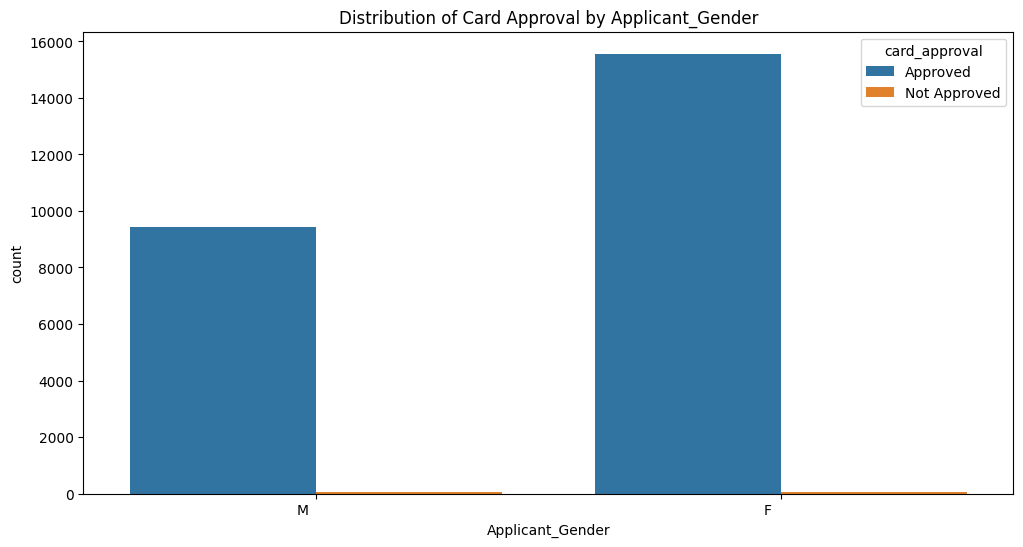

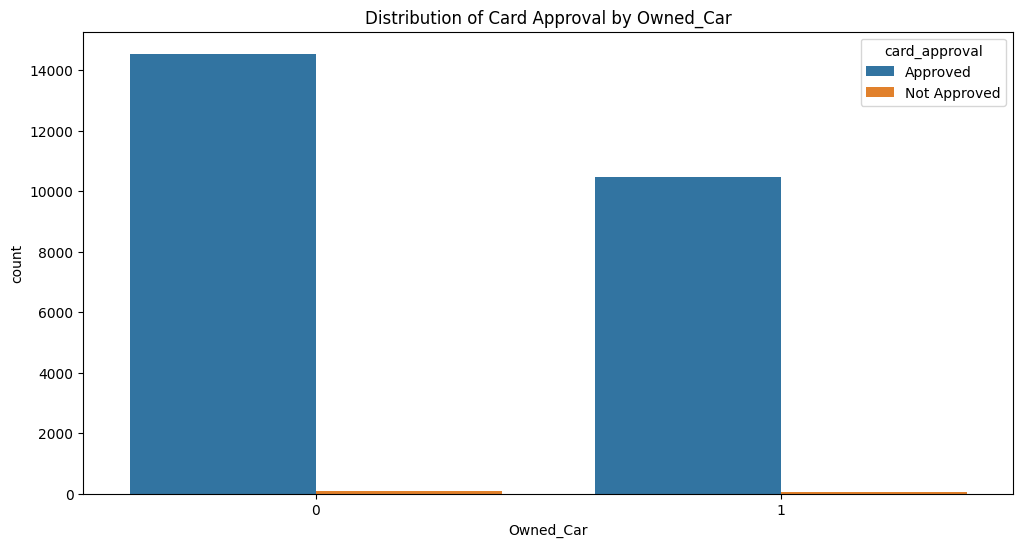

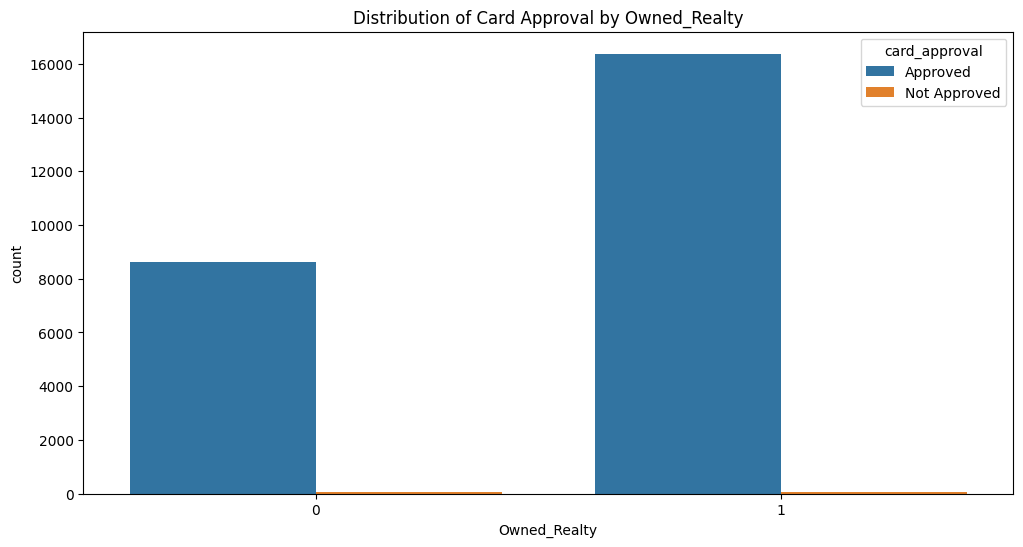

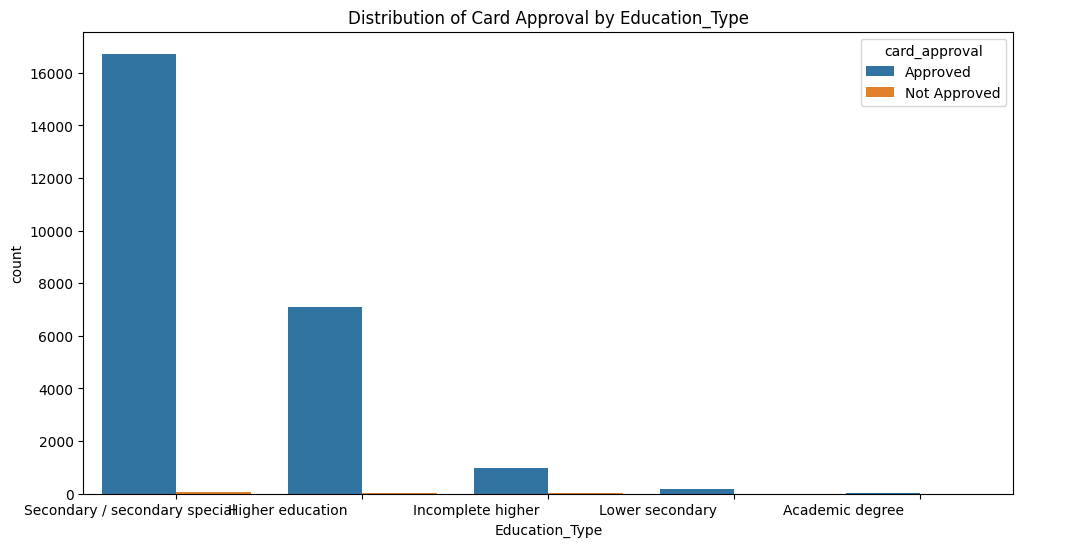

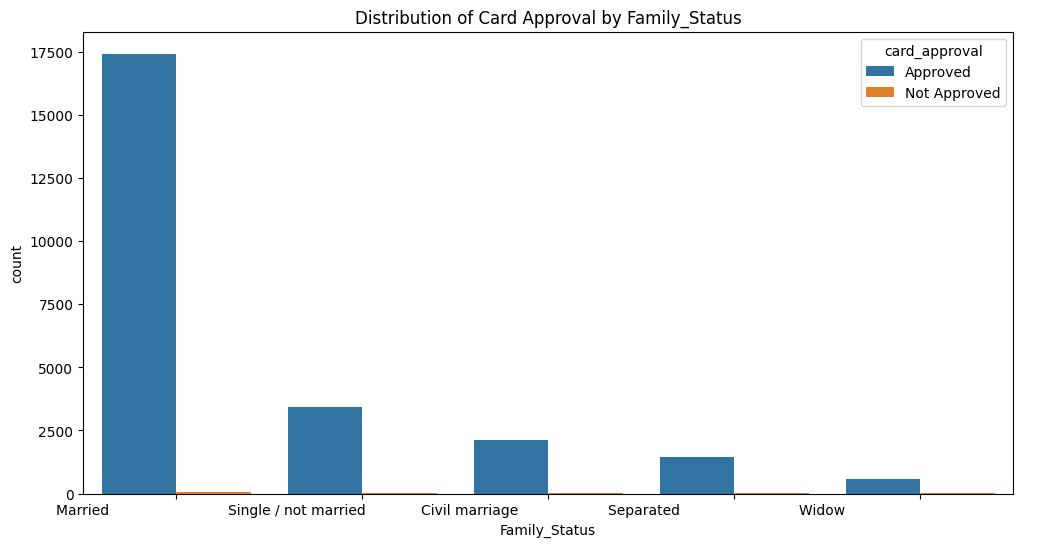

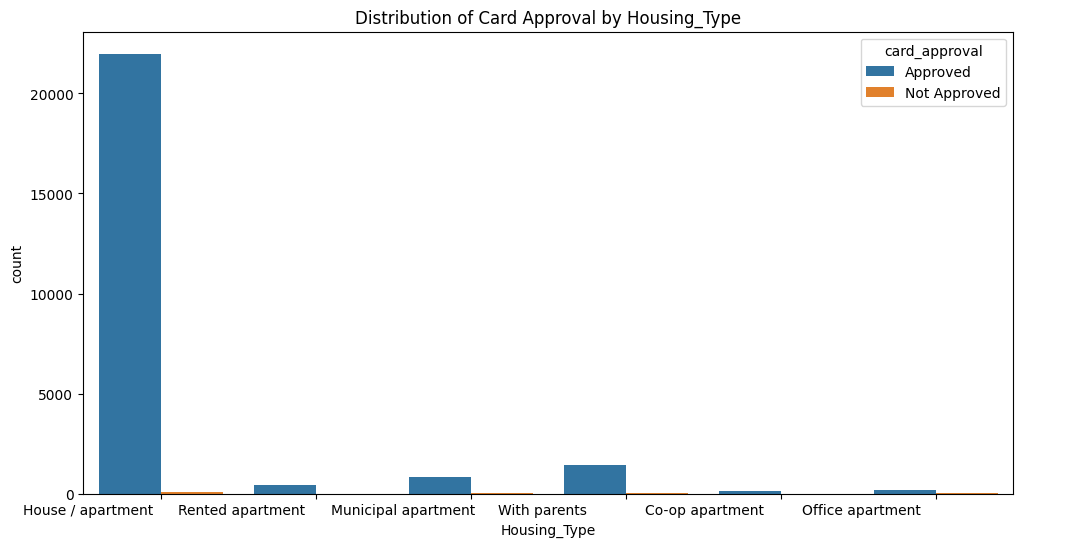

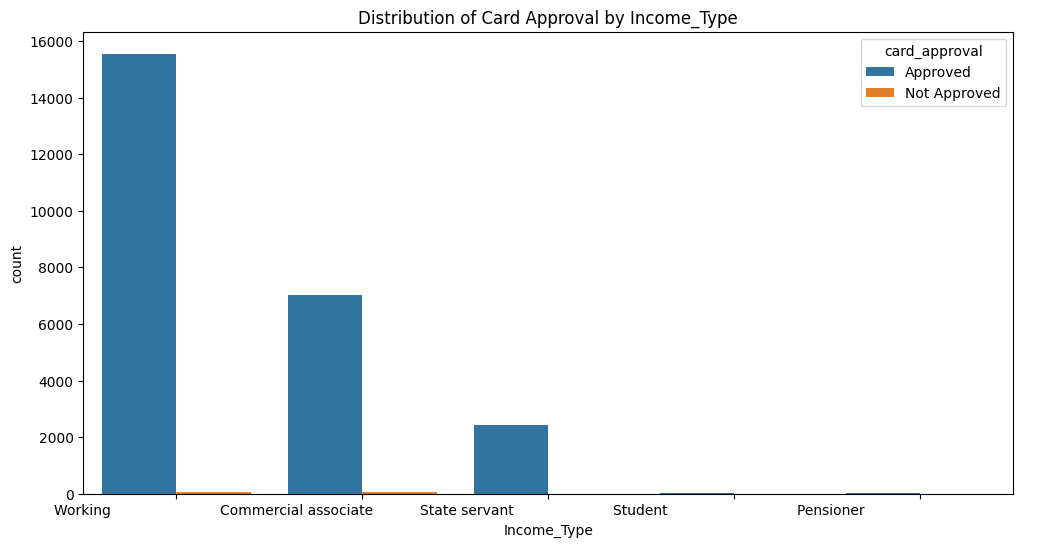

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Define a dictionary to map 0 to "Not Approved" and 1 to "Approved"
approval_mapping = {0: "Not Approved", 1: "Approved"}
# Visualize the relationship between card_approval and categorical features
categorical_features = ['Applicant_Gender', 'Owned_Car', 'Owned_Realty', 'Education_Type', 'Family_Status', 'Housing_Type', 'Income_Type']
for feature in categorical_features:
    plt.figure(figsize=(12,6))
    sns.countplot(x=feature, hue='card_approval', data=credit_Card_approval_df.replace({'card_approval': approval_mapping}))
    plt.title(f'Distribution of Card Approval by {feature}')
    plt.show()


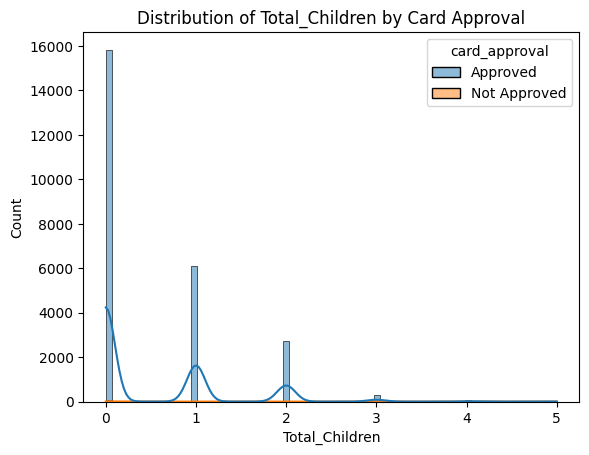

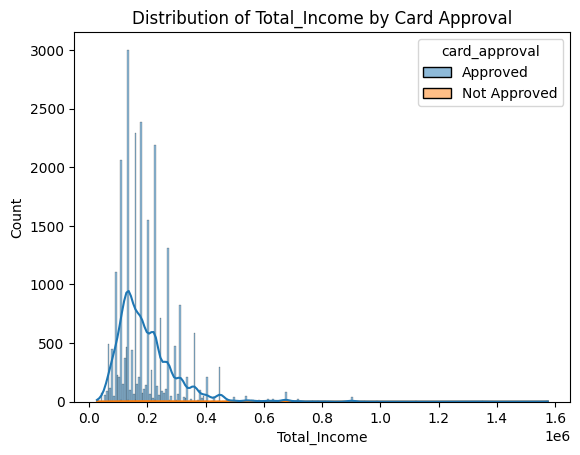

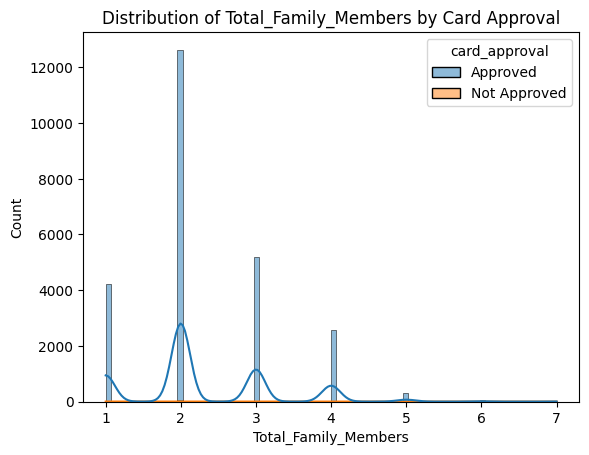

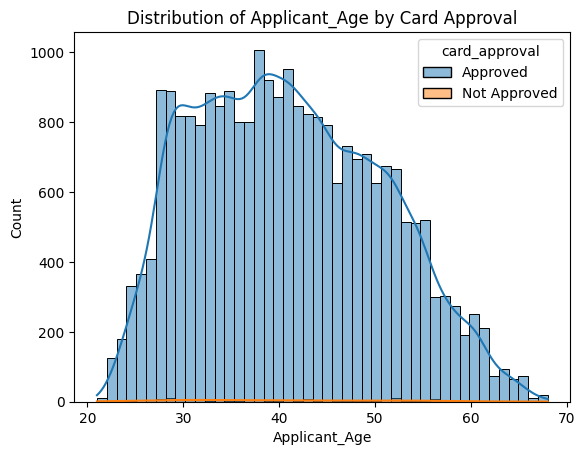

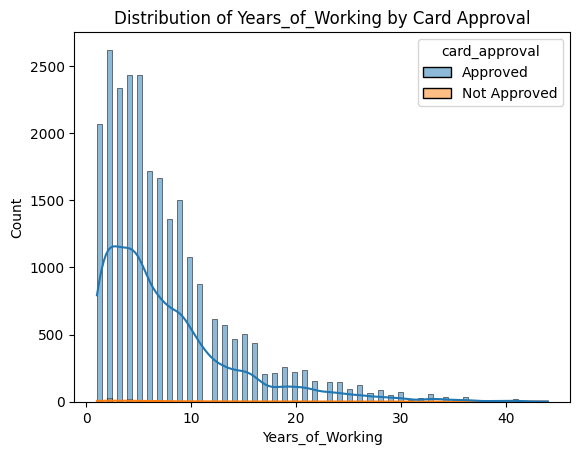

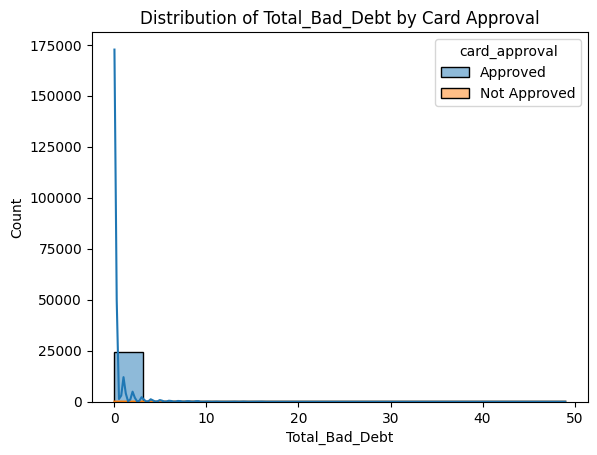

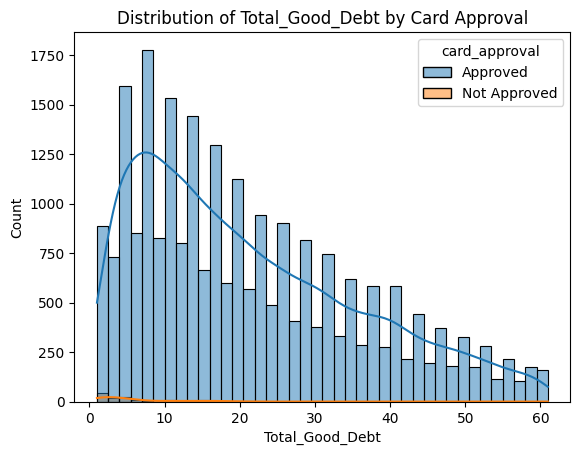

In [ ]:
# Visualize the distribution of numerical features by card_approval
numerical_features = ['Total_Children', 'Total_Income', 'Total_Family_Members', 'Applicant_Age', 'Years_of_Working', 'Total_Bad_Debt', 'Total_Good_Debt']
for feature in numerical_features:
    sns.histplot(x=feature, hue='card_approval', data=credit_Card_approval_df.replace({'card_approval': approval_mapping}), kde=True)
    plt.title(f'Distribution of {feature} by Card Approval')
    plt.show()


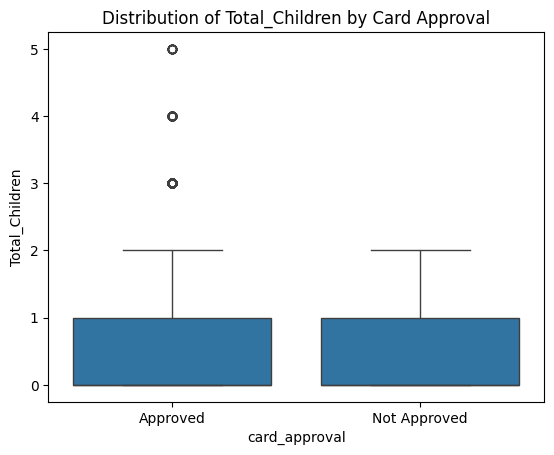

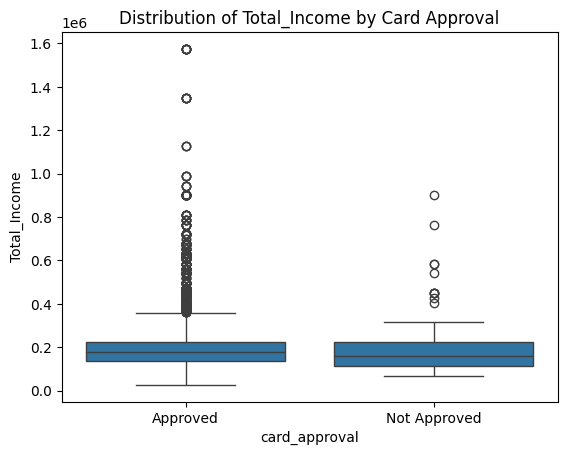

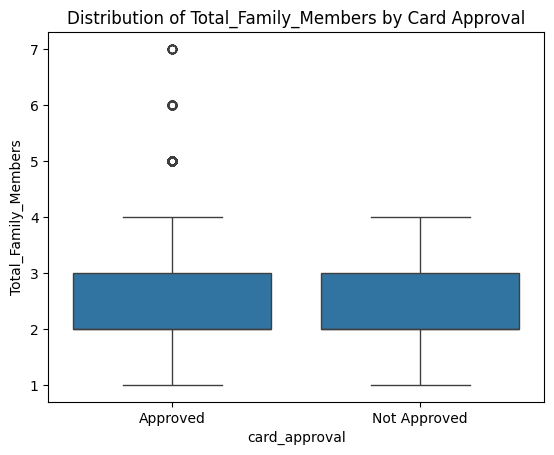

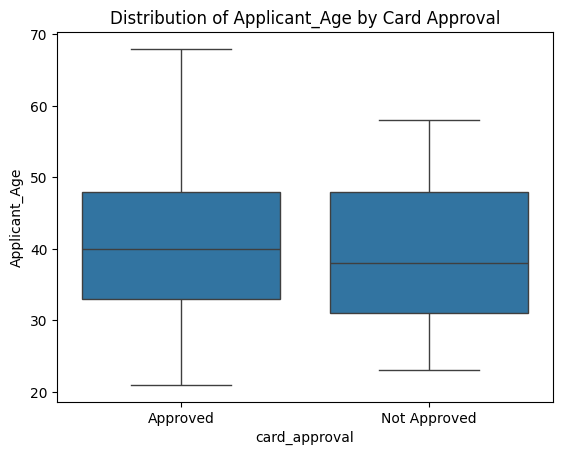

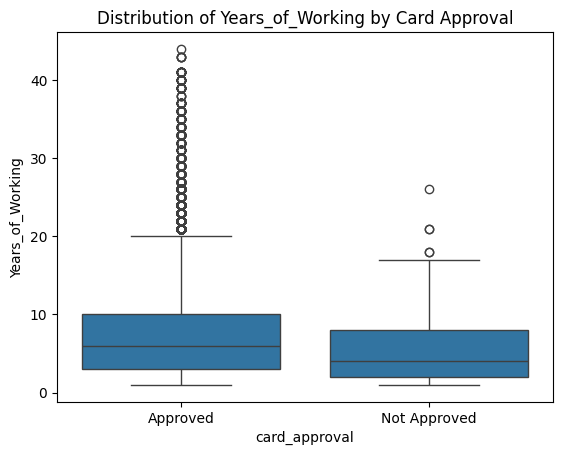

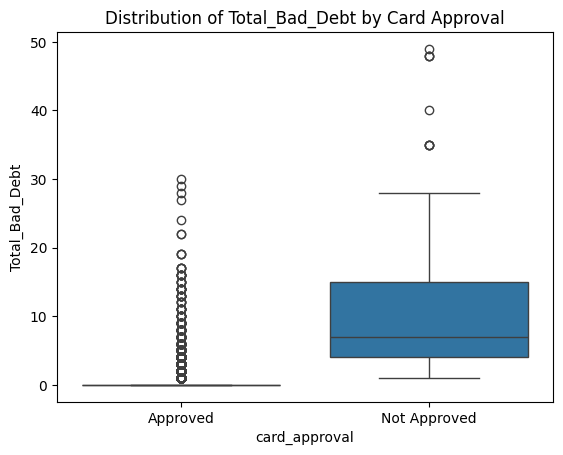

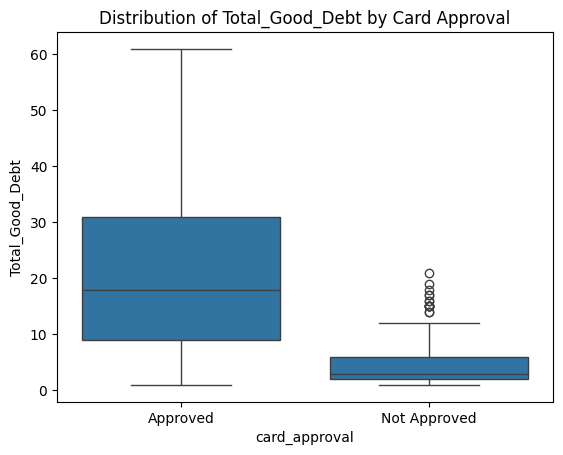

In [ ]:
# Visualize the distribution of numerical features using box plots
for feature in numerical_features:
    sns.boxplot(x='card_approval', y=feature, data=credit_Card_approval_df.replace({'card_approval': approval_mapping}))
    plt.title(f'Distribution of {feature} by Card Approval')
    plt.show()


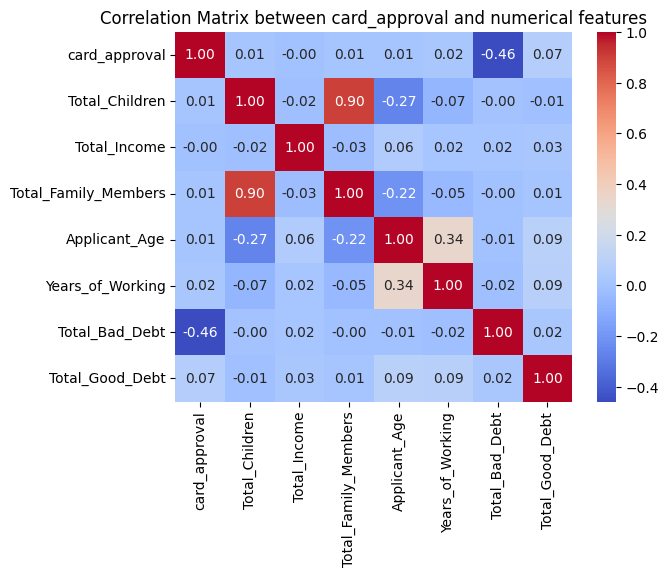

In [ ]:
# Correlation heatmap
correlation_matrix = credit_Card_approval_df[['card_approval'] + numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between card_approval and numerical features')
plt.show()


**Transforming features for analysis.**

In [ ]:
from collections import Counter
# Assuming y_train is your training set labels
class_counts = Counter(y_train)
print(class_counts)

Counter({1: 20006, 0: 96})


**Data Preprocessing and Splitting**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
# Assuming credit_Card_approval_df is your DataFrame
y = credit_Card_approval_df["card_approval"]
X = credit_Card_approval_df[['Applicant_Gender', 'Owned_Car', 'Owned_Realty','Total_Income', 'Education_Type', 'Family_Status', 'Housing_Type', 'Total_Family_Members', 'Applicant_Age', 'Years_of_Working', 'Total_Bad_Debt', 'Total_Good_Debt', 'Income_Type']]

# exclude the following features from data set
# These features were excluded because they did not seem to have a significant impact when applying the model.
# ['Owned_Mobile_Phone', 'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email','Total_Children',]]

# Encoding categorical features and scaling
categorical_features = ["Applicant_Gender", "Income_Type", "Education_Type", "Family_Status", "Housing_Type"]
numerical_features = ['Total_Income', 'Applicant_Age', 'Years_of_Working', 'Total_Good_Debt']
one_hot = OneHotEncoder()
scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ("one_hot", one_hot, categorical_features),
        ("scaler", scaler, numerical_features)
    ],
    remainder="passthrough"
)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Create a pipeline
model = make_pipeline(
    preprocessor,
    LogisticRegression(solver='lbfgs', random_state=1, max_iter=100)
)
# Fit the model using the training data
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  ['Applicant_Gender',
                                                   'Income_Type',
                                                   'Education_Type',
                                                   'Family_Status',
                                                   'Housing_Type']),
                                                 ('scaler', StandardScaler(),
                                                  ['Total_Income',
                                                   'Applicant_Age',
                                                   'Years_of_Working',
                                                   'Total_Good_Debt'])])),
                ('logisticregression', LogisticRegression(random_state=1))])

In [ ]:
from sklearn.metrics import balanced_accuracy_score
# Predict on the test data
y_pred = model.predict(X_test)
# Calculate the balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy Score:", balanced_accuracy)
from sklearn.metrics import confusion_matrix, classification_report
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Calculate the classification report
class_report = classification_report(y_test,y_pred)
print("Classification Report:")
print(class_report)

Balanced Accuracy Score: 0.7
Confusion Matrix:
[[  10   15]
 [   0 5001]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        25
           1       1.00      1.00      1.00      5001

    accuracy                           1.00      5026
   macro avg       1.00      0.70      0.78      5026
weighted avg       1.00      1.00      1.00      5026



**Installing LazyPredict**:

This code installs the LazyPredict library using pip. LazyPredict is a Python package that automates the model selection and evaluation process for supervised machine learning tasks.

In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models

 97%|█████████▋| 28/29 [01:20<00:00,  2.34it/s]

[LightGBM] [Info] Number of positive: 20006, number of negative: 96
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 20102, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.995224 -> initscore=5.339439
[LightGBM] [Info] Start training from score 5.339439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

100%|██████████| 29/29 [01:20<00:00,  2.78s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,1.00,0.98,0.98,1.00,0.74
AdaBoostClassifier,1.00,0.96,0.96,1.00,2.15
XGBClassifier,1.00,0.96,0.96,1.00,0.40
LGBMClassifier,1.00,0.96,0.96,1.00,0.50
DecisionTreeClassifier,1.00,0.94,0.94,1.00,0.61
PassiveAggressiveClassifier,1.00,0.84,0.84,1.00,0.21
LinearSVC,1.00,0.82,0.82,1.00,0.25
SGDClassifier,1.00,0.82,0.82,1.00,0.21
GaussianNB,0.66,0.79,0.79,0.79,0.34


**Training XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

# Create a pipeline with preprocessing steps and XGBClassifier
xgb_model = make_pipeline(
    preprocessor,
    XGBClassifier(random_state=1)
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predictions on the test set
xgb_predictions = xgb_model.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score

# Calculate the balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, xgb_predictions)

# Print the balanced accuracy score
print(f"Balanced Accuracy Score: {balanced_accuracy}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the classification report
class_report = classification_report(y_test, xgb_predictions)

# Print the classification report
print("Classification Report:")
print(class_report)


Balanced Accuracy Score: 0.96
Confusion Matrix:
[[  23    2]
 [   0 5001]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       1.00      1.00      1.00      5001

    accuracy                           1.00      5026
   macro avg       1.00      0.96      0.98      5026
weighted avg       1.00      1.00      1.00      5026



**Training BaggingClassifier**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# Define the BaggingClassifier
bagging_classifier = BaggingClassifier(random_state=1)

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', bagging_classifier)
])


In [ ]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

# Predict on the test data
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Calculate the balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy Score: {balanced_accuracy}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Balanced Accuracy Score: 0.98
Confusion Matrix:
[[  24    1]
 [   0 5001]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       1.00      1.00      1.00      5001

    accuracy                           1.00      5026
   macro avg       1.00      0.98      0.99      5026
weighted avg       1.00      1.00      1.00      5026

